# Noising Experiments for q = 0 and Salt and Pepper Noise


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import salt_and_pepper_noise, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray

Imagens default

In [2]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [3]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.634907         0.029301                  0.684007   
1  0    0.666667         0.000000                 -0.000000   

   Weighted Complexity Correct    prob0     prob1     prob2   image_name  
0                     0.309233  0.96824  0.030531  0.001229   colored_k6  
1                    -0.000000  1.00000  0.000000  0.000000  uniform 127

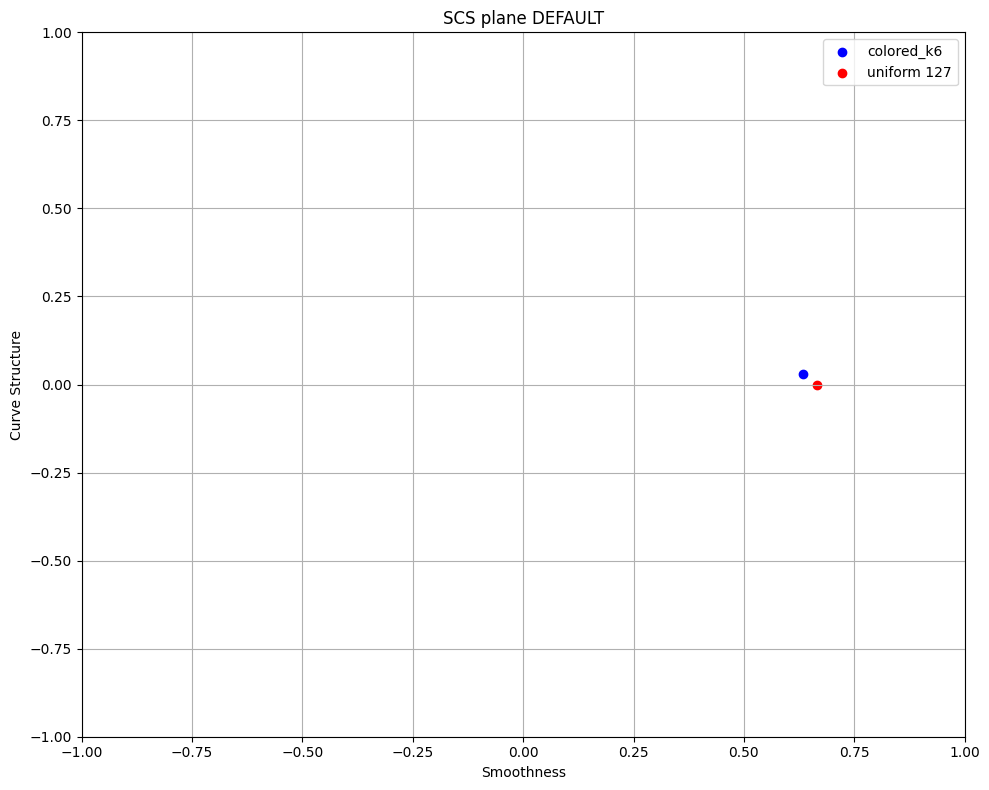

In [4]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(10, 8))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'SCS plane DEFAULT')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

--------------------------

In [2]:
image_data = pd.read_csv(f"results/noise_analysis/sp_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_default.csv")


In [10]:
image_data.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0 -2.0    0.093440         0.027402                  0.953413   
1 -1.0    0.140784        -0.010670                  0.986313   
2  0.0    0.110489        -0.097603                  0.988842   
3  1.0    0.078081        -0.137900                  0.990474   
4  2.0    0.056245        -0.147713                  0.991857   

   Weighted Complexity Correct     prob0     prob1     prob2 image_name  \
0                     0.055205  0.426773  0.300314  0.272912    default   
1                     0.017295  0.474117  0.257606  0.268277    default   
2                     0.014588  0.443822  0.229288  0.326890    default   
3                     0.012753  0.411414  0.225343  0.363243    default   
4                     0.010943  0.389578  0.231354  0.379068    default   

   noise_prob  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05

In [11]:
image_data_default.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0 -2.0    0.067346         0.047092                  0.979231   
1 -1.0    0.120766        -0.028040                  0.989541   
2  0.0    0.091364        -0.097603                  0.991430   
3  1.0    0.061068        -0.128199                  0.992830   
4  2.0    0.041491        -0.132692                  0.994008   

   Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
0                     0.026470  0.400680  0.323206  0.276114  colored_k6   
1                     0.013329  0.454099  0.258931  0.286970  colored_k6   
2                     0.011273  0.424698  0.238850  0.336452  colored_k6   
3                     0.009604  0.394401  0.238700  0.366899  colored_k6   
4                     0.008034  0.374825  0.246242  0.378934  colored_k6   

   noise_prob  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05

In [3]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['default' 'canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']
['colored_k6' 'uniform 127']


In [4]:
print("Image data NOISE PROB unique",image_data.noise_prob.unique())
print("Default data NOISE PROB unique",image_data_default.noise_prob.unique())

Image data NOISE PROB unique [0.05 0.1  0.2  0.3  0.4 ]
Default data NOISE PROB unique [0.05       0.07315789 0.09631579 0.11947368 0.14263158 0.16578947
 0.18894737 0.21210526 0.23526316 0.25842105 0.28157895 0.30473684
 0.32789474 0.35105263 0.37421053 0.39736842 0.42052632 0.44368421
 0.46684211 0.49      ]


In [5]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')& (image_data['image_name'] != 'default')]

In [6]:
print(dataset_data.shape)
dataset_data.head()

(2875, 10)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
115 -2.0         NaN         0.000000                 -0.000000   
116 -1.0         NaN         0.000000                 -0.000000   
117  0.0    0.145254         0.171710                  0.962534   
118  1.0    0.064264         0.165094                  0.983344   
119  2.0    0.008405         0.145467                  0.988949   

     Weighted Complexity Correct     prob0     prob1     prob2  \
115                          NaN       NaN  0.000000  0.000000   
116                          NaN       NaN  0.000000  0.000000   
117                     0.047099  0.478588  0.346561  0.174851   
118                     0.021538  0.397597  0.383748  0.218654   
119                     0.014293  0.341738  0.401864  0.256398   

                    image_name  noise_prob  
115  canesugar01-r000-s001.png        0.05  
116  canesugar01-r000-s001.png        0.05  
117  canesugar01-r000-s001.png        0.05  
118  canesugar01-r000-s001.png        0.05  
119  canesugar01-r000-s001.png        0.05

Plotting the plane for the default images (q=0)

In [7]:
q_value = 0
default_data_q0 = default_data[(default_data['q'] == q_value)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(920, 10)
(40, 10)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
2   0.0    0.091364        -0.097603                  0.991430   
25  0.0    0.080368        -0.078137                  0.993398   
48  0.0    0.055984        -0.075610                  0.995686   
71  0.0    0.051750        -0.061949                  0.995884   
94  0.0    0.040275        -0.044328                  0.996443   

    Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
2                      0.011273  0.424698  0.238850  0.336452  colored_k6   
25                     0.008616  0.413701  0.254081  0.332218  colored_k6   
48                     0.005647  0.389318  0.267536  0.343146  colored_k6   
71                     0.005346  0.385083  0.276484  0.338433  colored_k6   
94                     0.004609  0.373608  0.291032  0.335360  colored_k6   

    noise_prob  
2     0.050000  
25    0.073158  
48    0.096316  
71    0.119474  
94    0.142632

In [8]:
default_data[(default_data['q'] == 0) & (default_data['noise_prob'] == 0.05)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
2    0.0    0.091364        -0.097603                  0.991430   
462  0.0    0.428841         0.063930                  0.357586   

     Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
2                       0.011273  0.424698  0.238850  0.336452   colored_k6   
462                     0.231049  0.762175  0.150878  0.086948  uniform 127   

     noise_prob  
2          0.05  
462        0.05

In [19]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

In [16]:
default_data[(default_data['q'] == 0) & (default_data['noise_prob'] == 0)]

Empty DataFrame
Columns: [q, Smoothness, Curve structure, Weighted Entropy Correct, Weighted Complexity Correct, prob0, prob1, prob2, image_name, noise_prob]
Index: []

Get no noise data

In [9]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data['noise_prob'] = 0
    image_data_list.append(image_data)
data_default_no_noise = pd.concat(image_data_list, ignore_index=True)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [10]:
default_data_q0 = pd.concat([default_data_q0, data_default_no_noise], ignore_index=True)
default_data_q0.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0.0    0.091364        -0.097603                  0.991430   
1  0.0    0.080368        -0.078137                  0.993398   
2  0.0    0.055984        -0.075610                  0.995686   
3  0.0    0.051750        -0.061949                  0.995884   
4  0.0    0.040275        -0.044328                  0.996443   

   Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
0                     0.011273  0.424698  0.238850  0.336452  colored_k6   
1                     0.008616  0.413701  0.254081  0.332218  colored_k6   
2                     0.005647  0.389318  0.267536  0.343146  colored_k6   
3                     0.005346  0.385083  0.276484  0.338433  colored_k6   
4                     0.004609  0.373608  0.291032  0.335360  colored_k6   

   noise_prob  
0    0.050000  
1    0.073158  
2    0.096316  
3    0.119474  
4    0.142632

In [18]:
default_data_q0

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0.0    0.091364        -0.097603                  0.991430   
1   0.0    0.080368        -0.078137                  0.993398   
2   0.0    0.055984        -0.075610                  0.995686   
3   0.0    0.051750        -0.061949                  0.995884   
4   0.0    0.040275        -0.044328                  0.996443   
5   0.0    0.029483        -0.044054                  0.996089   
6   0.0    0.026068        -0.020012                  0.994537   
7   0.0    0.013023        -0.016256                  0.994000   
8   0.0    0.020604        -0.015504                  0.991167   
9   0.0    0.024771        -0.002186                  0.986581   
10  0.0    0.021902        -0.001639                  0.984286   
11  0.0    0.016370         0.007308                  0.979524   
12  0.0    0.016643         0.004440                  0.976260   
13  0.0    0.016028         0.012158                  0.971759   
14  0.0    0.011384         0.011611                  0.966609   
15  0.0    0.019990         0.023632                  0.961860   
16  0.0    0.015413         0.019602                  0.956505   
17  0.0    0.019375         0.019193                  0.947965   
18  0.0    0.015345         0.034560                  0.942683   
19  0.0    0.028391         0.038044                  0.933582   
20  0.0    0.428841         0.063930                  0.357586   
21  0.0    0.355896         0.072809                  0.457391   
22  0.0    0.292717         0.077659                  0.538502   
23  0.0    0.251736         0.073287                  0.595719   
24  0.0    0.210550         0.073492                  0.656452   
25  0.0    0.181864         0.064613                  0.701071   
26  0.0    0.152699         0.058398                  0.739748   
27  0.0    0.142454         0.054983                  0.764149   
28  0.0    0.129681         0.043986                  0.785208   
29  0.0    0.105298         0.046240                  0.808450   
30  0.0    0.105366         0.038522                  0.825147   
31  0.0    0.094916         0.014548                  0.839905   
32  0.0    0.097853         0.020490                  0.848841   
33  0.0    0.082144         0.017485                  0.855192   
34  0.0    0.083032         0.015778                  0.859600   
35  0.0    0.083510         0.004098                  0.865307   
36  0.0    0.080300         0.006215                  0.865863   
37  0.0    0.080914         0.014616                  0.870158   
38  0.0    0.091501         0.007172                  0.871548   
39  0.0    0.076748         0.005259                  0.871688   
40  0.0    0.640097         0.026296                  0.682564   
41  0.0    0.666667         0.000000                 -0.000000   

    Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
0                      0.011273  0.424698  0.238850  0.336452   colored_k6   
1                      0.008616  0.413701  0.254081  0.332218   colored_k6   
2                      0.005647  0.389318  0.267536  0.343146   colored_k6   
3                      0.005346  0.385083  0.276484  0.338433   colored_k6   
4                      0.004609  0.373608  0.291032  0.335360   colored_k6   
5                      0.005052  0.362817  0.296564  0.340619   colored_k6   
6                      0.007014  0.359402  0.310293  0.330305   colored_k6   
7                      0.007824  0.346356  0.318694  0.334950   colored_k6   
8                      0.011345  0.353938  0.315279  0.330783   colored_k6   
9                      0.017245  0.358104  0.319855  0.322041   colored_k6   
10                     0.020137  0.355235  0.321563  0.323202   colored_k6   
11                     0.026345  0.349703  0.328803  0.321494   colored_k6   
12                     0.030276  0.349976  0.327232  0.322792   colored_k6   
13                     0.035921  0.349361  0.331398  0.319240   colored_k6 

40    0.000000
0     0.050000
1     0.073158
2     0.096316
3     0.119474
4     0.142632
5     0.165789
6     0.188947
7     0.212105
8     0.235263
9     0.258421
10    0.281579
11    0.304737
12    0.327895
13    0.351053
14    0.374211
15    0.397368
16    0.420526
17    0.443684
18    0.466842
19    0.490000
Name: noise_prob, dtype: float64
41    0.000000
20    0.050000
21    0.073158
22    0.096316
23    0.119474
24    0.142632
25    0.165789
26    0.188947
27    0.212105
28    0.235263
29    0.258421
30    0.281579
31    0.304737
32    0.327895
33    0.351053
34    0.374211
35    0.397368
36    0.420526
37    0.443684
38    0.466842
39    0.490000
Name: noise_prob, dtype: float64


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1058165242.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1058165242.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1058165242.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


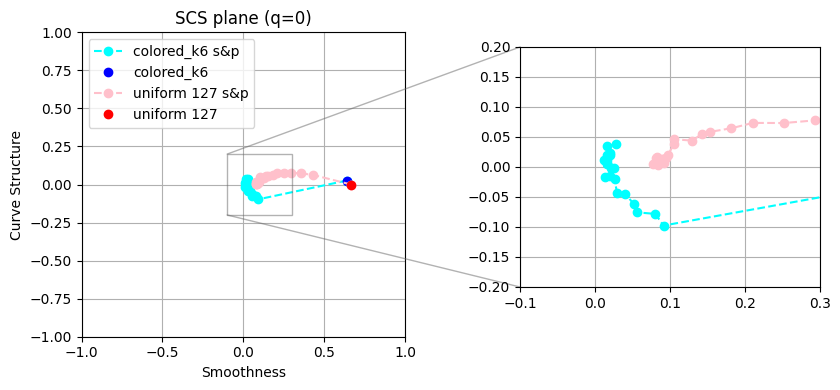

In [51]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_prob')
    print(df_data_filtered['noise_prob'])
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.1, 0.3, -0.2, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\2320885361.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\2320885361.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\2320885361.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be inc

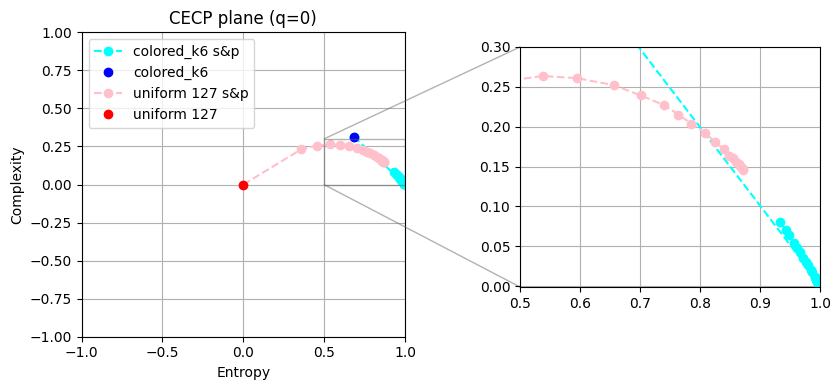

In [47]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_prob')
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    # plt.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Weighted Entropy Correct vs. Weighted Complexity Correct, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q={q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.5, 1, -0.001, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

Plotting the plane for the dataset images (q=0)

In [48]:
q_value = 0
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(2875, 10)
(125, 10)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
117  0.0    0.145254         0.171710                  0.962534   
140  0.0    0.084603         0.153405                  0.976376   
163  0.0    0.040070         0.088519                  0.982376   
186  0.0    0.014662         0.067072                  0.972049   
209  0.0    0.022312         0.046991                  0.952925   

     Weighted Complexity Correct     prob0     prob1     prob2  \
117                     0.047099  0.478588  0.346561  0.174851   
140                     0.029879  0.417936  0.367734  0.214330   
163                     0.022241  0.373403  0.357558  0.269039   
186                     0.035602  0.347995  0.359538  0.292466   
209                     0.058773  0.355645  0.345673  0.298682   

                    image_name  noise_prob  
117  canesugar01-r000-s001.png        0.05  
140  canesugar01-r000-s001.png        0.10  
163  canesugar01-r000-s001.png        0.20  
186  canesugar01-r000-s001.png        0.30  
209  canesugar01-r000-s001.png        0.40

In [49]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

In [33]:
dataset_data_q0['noise_prob'].unique()

array([0.05, 0.1 , 0.2 , 0.3 , 0.4 ])

In [ ]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # noise probabilities
    prob_values = dataset_data_q0['noise_prob'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, prob_chosen in enumerate(prob_values):
        # noised image
        noised_image = salt_and_pepper_noise(prob_chosen, prob_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} prob {prob_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(6, 8):
        # Get the original data (no noise)
        image_data = get_img_info(gs_image, q_linspace = [0])
        image_data['image_name'] = imageName
        image_data['noise_prob'] = 0
        # adds no noise info to previous dataframe
        df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True)
        # get data varying prob
        df_noised_sd = df_data_filtered
        axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        
        
        df_no_noise = image_data
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        # for j,sd_chosen in scatter_idxs:

        #     # Add colorbar for each subplot
        #     cbar = fig.colorbar(scatter, ax=axs[i][j])
        #     cbar.set_label('q')
        #     # Set title and labels for the subplot
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 6:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_sd['Smoothness'])-0.1, np.max(df_noised_sd['Smoothness'])+0.1])
            axs[i][index].set_ylim([np.min(df_noised_sd['Curve structure'])-0.1, np.max(df_noised_sd['Curve structure'])+0.1])
# Adjust layout to prevent overlap
plt.tight_layout()
fig.suptitle(f"Periodic on dataset - q = {q_value}", size='xx-large')
fig.subplots_adjust(top=0.97)
# Save
plt.savefig(f'results/noise_analysis/q0/planes/sp_dataset_comparing_SCSplane_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

Saving

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1455625187.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1455625187.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1455625187.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--

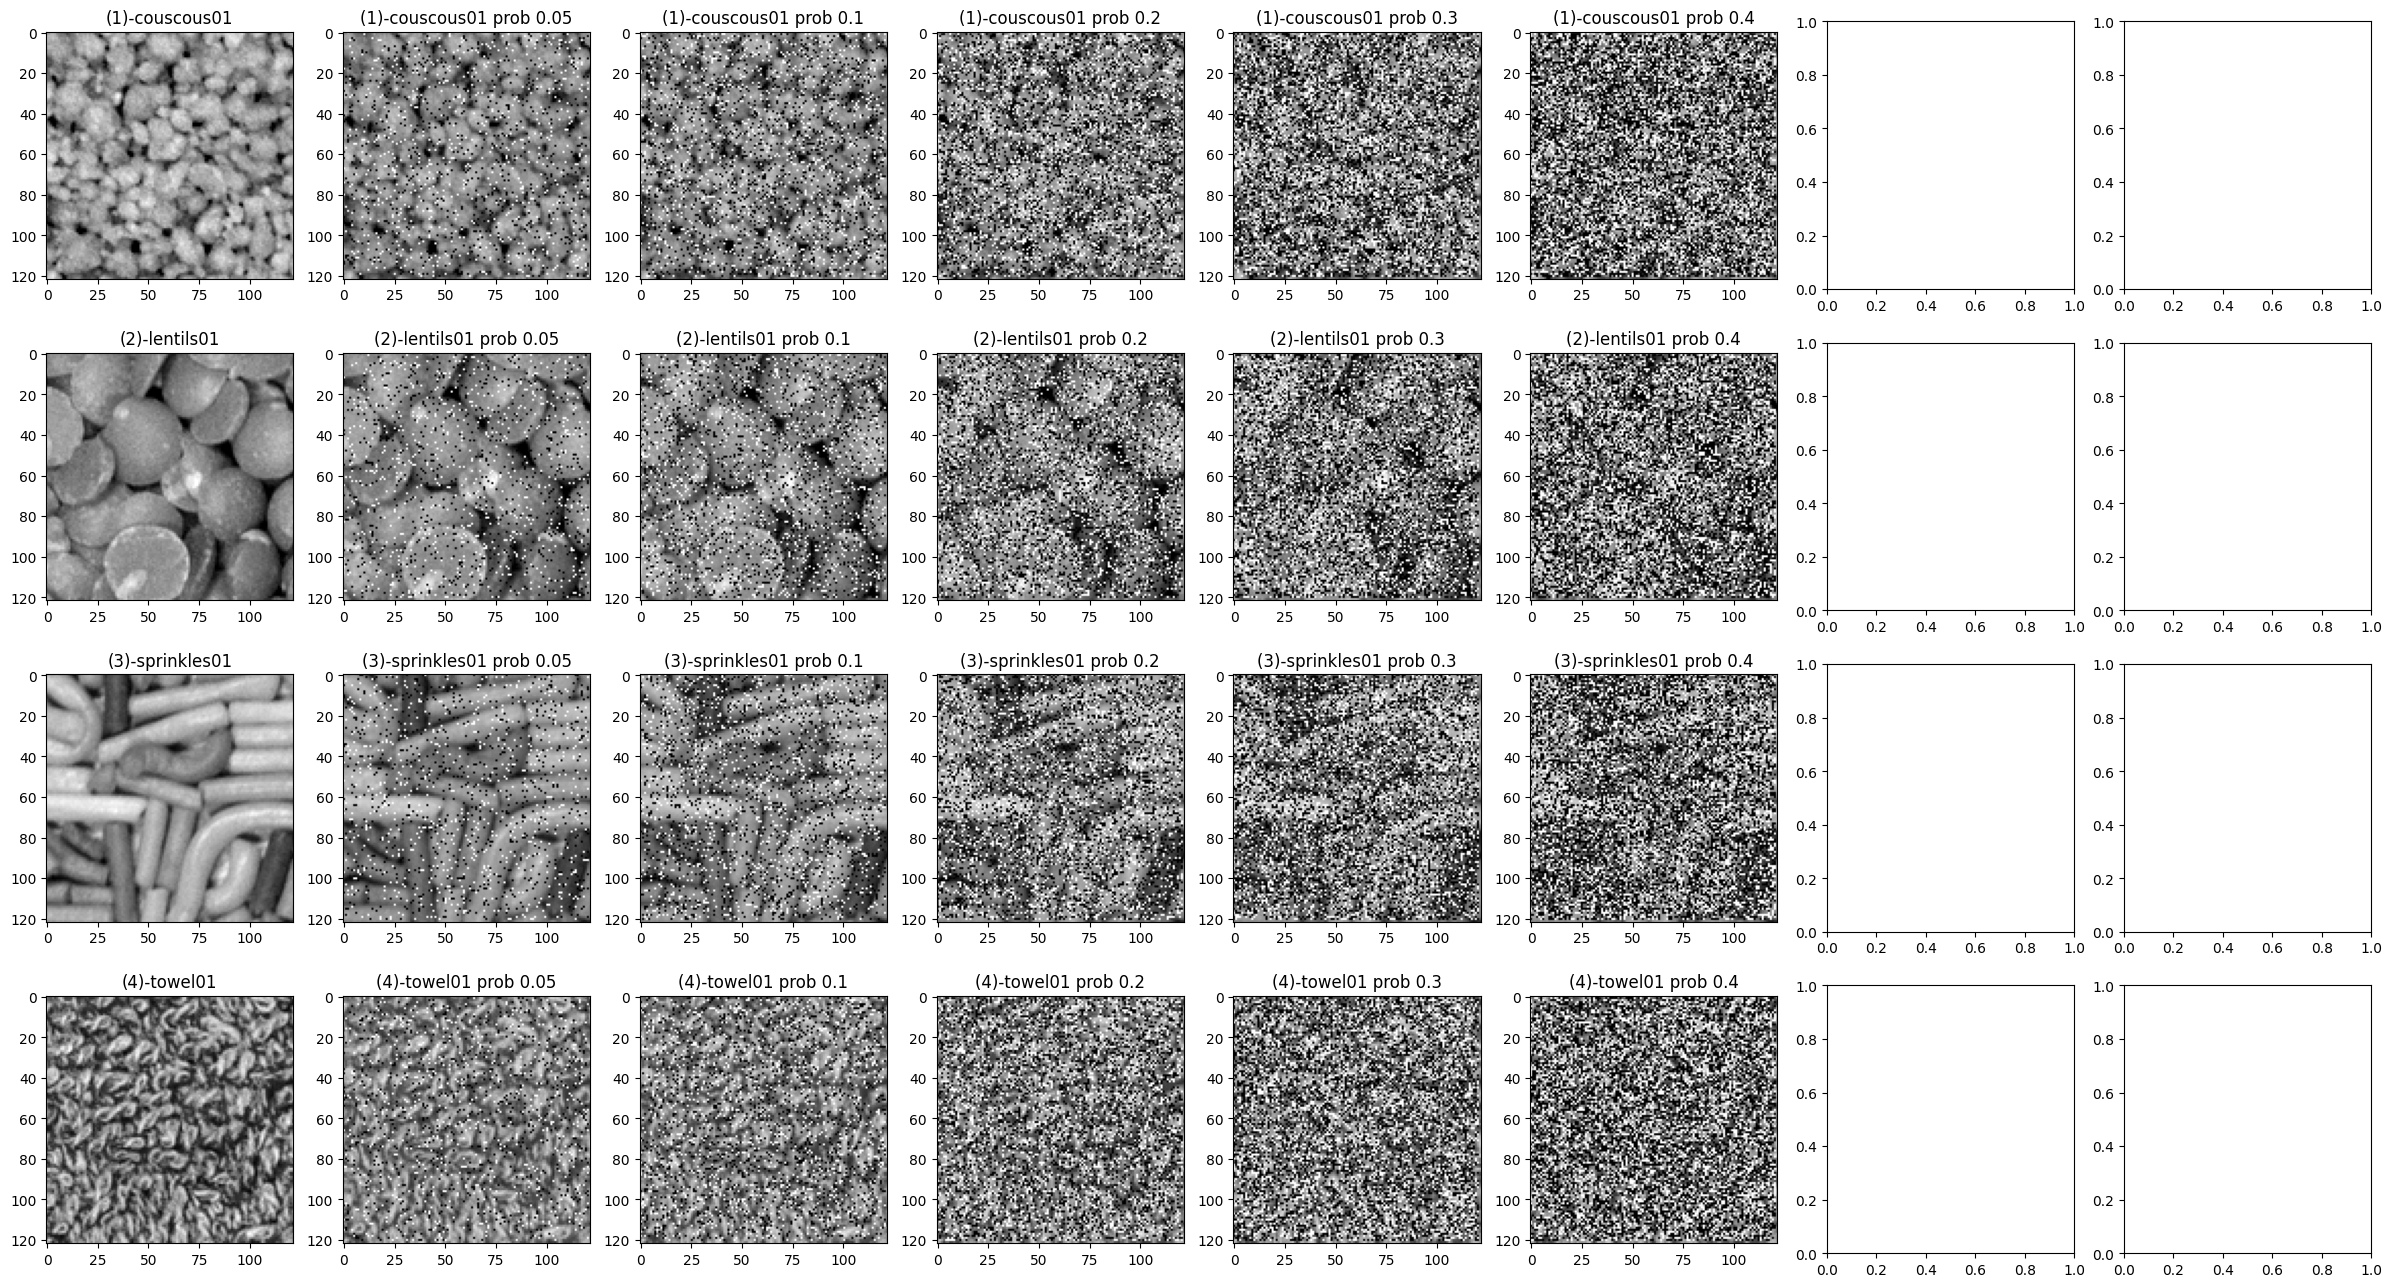

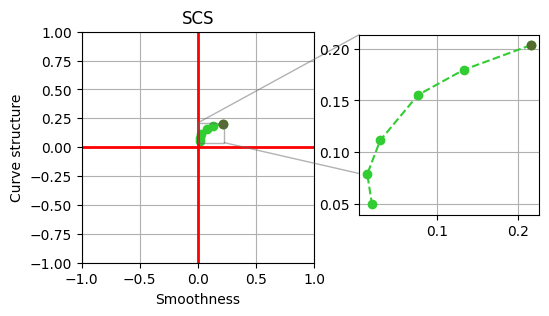

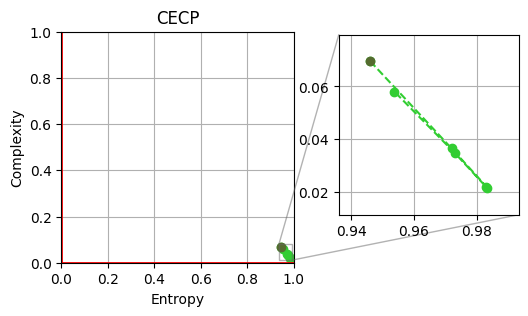

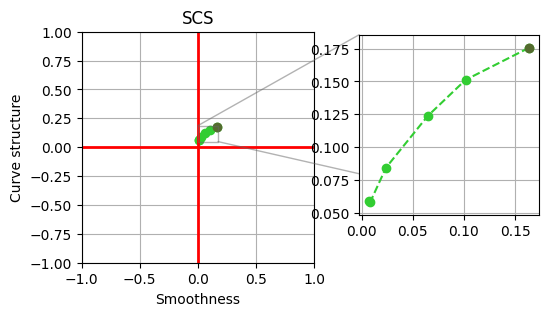

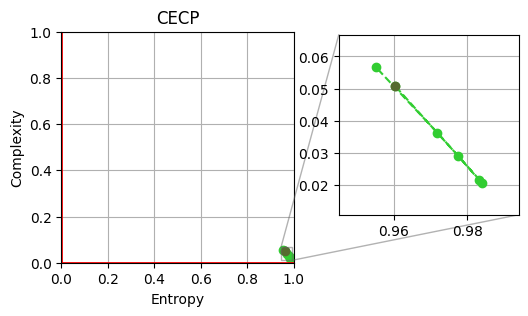

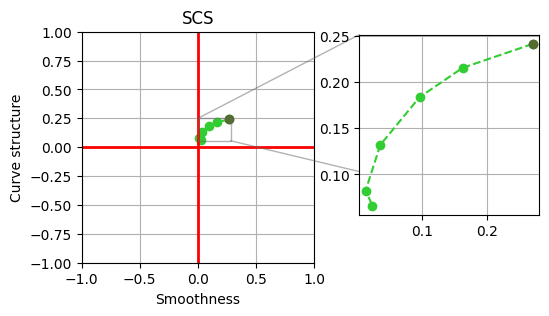

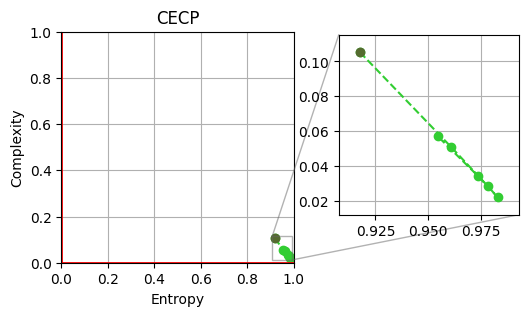

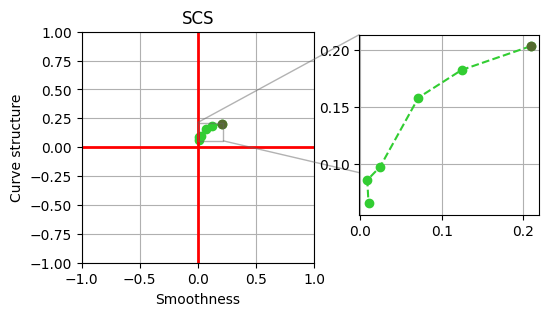

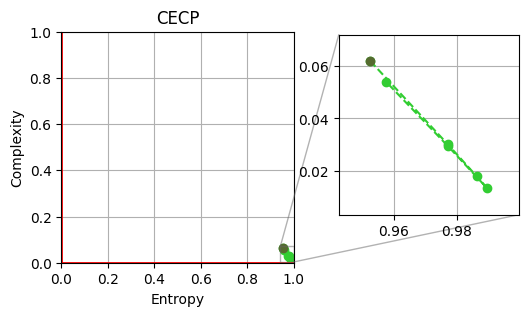

In [50]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/sp/images"
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # noise probabilities
    prob_values = dataset_data_q0['noise_prob'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, prob_chosen in enumerate(prob_values):
        # noised image
        noised_image = salt_and_pepper_noise(prob_chosen, prob_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-prob-{prob_chosen}.png")
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} prob {prob_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # Get the original data (no noise)
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = imageName
    image_data['noise_prob'] = 0
    # adds no noise info to previous dataframe
    df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True)
    for (x_label, y_label) in [('Smoothness', 'Curve structure'),('Weighted Entropy Correct', 'Weighted Complexity Correct')]:        
        fig, ax_main =plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])
        # get data varying prob
        df_noised_sd = df_data_filtered
        ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        # no noise
        df_no_noise = image_data
        # plot it
        ax_main.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        axins.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        
        x1, x2 = np.min(df_noised_sd[x_label])-0.01, np.max(df_noised_sd[x_label])+0.01
        y1, y2 = np.min(df_noised_sd[y_label])-0.01, np.max(df_noised_sd[y_label])+0.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
                
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='r')
        ax_main.axvline(x=0, lw=2, color='r')

        if x_label == 'Smoothness':
            ax_main.set_xlabel(x_label)
            ax_main.set_ylabel(y_label)
            ax_main.set_title('SCS')
            ax_main.set_xlim([-1, 1])
            ax_main.set_ylim([-1, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_xlabel('Entropy')
            ax_main.set_ylabel('Complexity')
            ax_main.set_title('CECP')
            ax_main.set_xlim([0, 1])
            ax_main.set_ylim([0, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-cecp.png', bbox_inches='tight')

## SKI IMAGES

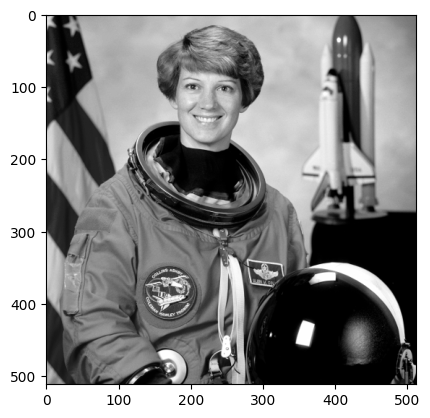

In [19]:
astronaut_image = data.astronaut()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

In [39]:
skimage_data = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_skimage_v2.csv")
skimage_data.head(10)

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.237211         0.143550                  0.919862   
1  0    0.159764         0.132364                  0.947379   
2  0    0.107773         0.115475                  0.960220   
3  0    0.060051         0.082981                  0.964914   
4  0    0.042849         0.060118                  0.953813   
5  0    0.043105         0.050034                  0.933423   
6  0    0.279026         0.178632                  0.919166   
7  0    0.172858         0.166793                  0.958201   
8  0    0.104482         0.149848                  0.974583   
9  0    0.038462         0.102036                  0.981383   

   Weighted Complexity Correct     prob0     prob1     prob2      image_name  \
0                     0.086886  0.570544  0.286503  0.142953  data.astronaut   
1                     0.057868  0.493097  0.319633  0.187270  data.astronaut   
2                     0.044212  0.441106  0.337185  0.221709  data.astronaut   
3                     0.040298  0.393385  0.344798  0.261817  data.astronaut   
4                     0.054089  0.376182  0.341968  0.281850  data.astronaut   
5                     0.077689  0.376439  0.336798  0.286764  data.astronaut   
6                     0.096968  0.612360  0.283136  0.104504        data.cat   
7                     0.051415  0.506191  0.330301  0.163508        data.cat   
8                     0.031640  0.437815  0.356016  0.206169        data.cat   
9                     0.023614  0.371795  0.365121  0.263084        data.cat   

   noise_prob  
0        0.00  
1        0.05  
2        0.10  
3        0.20  
4        0.30  
5        0.40  
6        0.00  
7        0.05  
8        0.10  
9        0.20

In [40]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [73]:
skimage_data['noise_prob'].unique()

array([0.  , 0.05, 0.1 , 0.2 , 0.3 , 0.4 ])

In [74]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\79254876.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\79254876.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\79254876.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


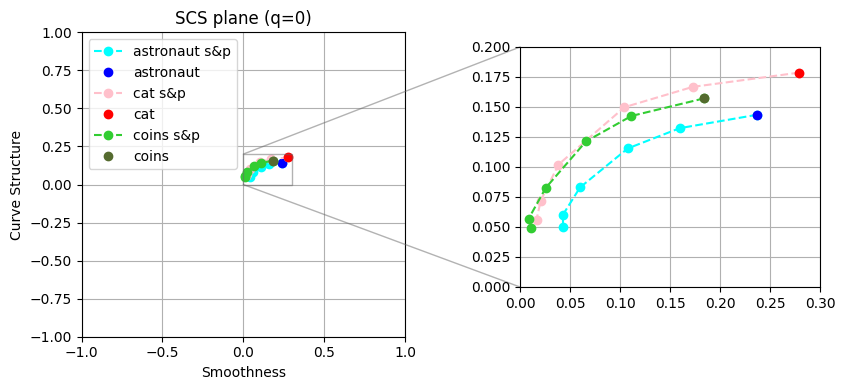

In [42]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}
unique_skimage_images = skimage_data['image_name'].unique()


fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['noise_prob'] == 0)]
    
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0, 0.3, 0, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1499034748.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1499034748.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_37828\1499034748.py:49: UserWarning: This figure includes Axes that are not compatible with tight_lay

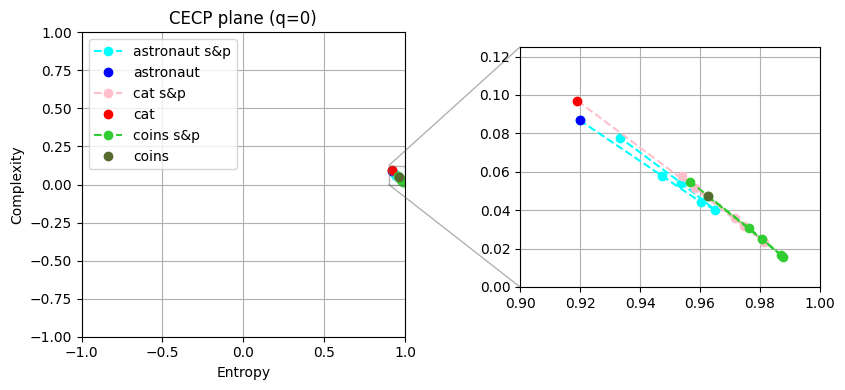

In [44]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}
unique_skimage_images = skimage_data['image_name'].unique()


fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['noise_prob'] == 0)]
    
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    # plt.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q={q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.9, 1, 0, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()